## Import Libraries

In [97]:
# importação das bibliotecas
import pandas as pd
import numpy as np

from sklearn.neighbors     import KNeighborsClassifier 
from sklearn               import metrics                 as mt, tree
from sklearn.ensemble      import RandomForestClassifier, RandomForestRegressor
from sklearn               import linear_model
from matplotlib            import pyplot                  as plt
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.cluster       import KMeans, AffinityPropagation
from sklearn.decomposition import PCA

## Classification Algorithms

### Load Data

In [2]:
# dados de treino, validação e teste
X_train = pd.read_csv('classificacao\\X_training.csv')
Y_train = pd.read_csv('classificacao\\y_training.csv')

X_validation = pd.read_csv('classificacao\\X_validation.csv')
Y_validation = pd.read_csv('classificacao\\Y_validation.csv')

X_test = pd.read_csv('classificacao\\X_test.csv')
Y_test = pd.read_csv('classificacao\\y_test.csv')

### Features Selection

In [3]:
# seleção das variáveis preditoras
features = ['customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

label = ['0']

X_train = X_train.loc[:, features]
Y_train = Y_train.loc[:, label]

### Clean Data

In [4]:
# remoção da coluna ID
X_validation = X_validation.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [5]:
# verificação do balanceamento das classes
Y_train.value_counts(normalize=True)

0
0    0.5666
1    0.4334
Name: proportion, dtype: float64

### KNN

In [15]:
# verificação do melhor parâmetro do treinamento
k = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
train_scores = []
valid_scores = []
results = []

for x in k:
    knn_classifier = KNeighborsClassifier(n_neighbors = x)
    knn_classifier.fit(X_train, Y_train.values.ravel())

    y_pred_train = knn_classifier.predict(X_train)
    acc_train_scor = mt.accuracy_score(Y_train, y_pred_train)
    train_scores.append(acc_train_scor)
    
    y_pred_valid = knn_classifier.predict(X_validation)
    acc_valid_scor = mt.accuracy_score(Y_validation, y_pred_valid)
    valid_scores.append(acc_valid_scor)
    
    results.append({
                "K": x,
                "Accuracy_train": acc_train_scor,
                "Accuracy_valid": acc_valid_scor
            })

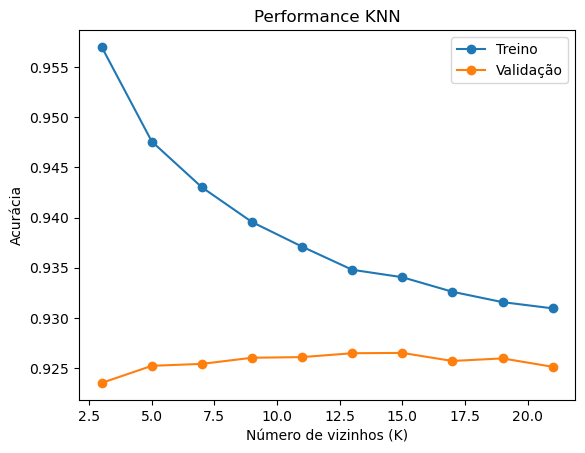

In [17]:
# plotagem comparativa da acurácia com dados de treino e validação
plt.plot(k, train_scores, '-o', label='Treino')
plt.plot(k, valid_scores, '-o', label='Validação')
plt.xlabel("Número de vizinhos (K)")
plt.ylabel("Acurácia")
plt.title("Performance KNN")
plt.legend()
plt.show()

In [18]:
# criação de DataFrame para visualização dos dados
df_knn = pd.DataFrame(results)
df_knn.sort_values('Accuracy_valid', ascending = False).head(5)

,K,Accuracy_train,Accuracy_valid
6,15,0.934055,0.926510
5,13,0.934800,0.926478
4,11,0.937103,0.926092
3,9,0.939557,0.926027
8,19,0.931573,0.925963


In [19]:
# definição dos parâmetros para treinamento
knn_classifier = KNeighborsClassifier( n_neighbors = 15 )

# treinamento do algoritmo
knn_classifier = knn_classifier.fit(X_train, Y_train.values.ravel())

In [27]:
# predição em dados de treino, validação e teste
y_train_knn = knn_classifier.predict(X_train)
y_valid_knn = knn_classifier.predict(X_validation)
y_test_knn = knn_classifier.predict(X_test)

#### Metrics

In [28]:
# Dados de Treino

#acuracia
accuracy_train_knn = mt.accuracy_score(Y_train, y_train_knn)
#precisao
precision_train_knn = mt.precision_score(Y_train, y_train_knn)
#recall
recall_train_knn = mt.recall_score(Y_train, y_train_knn)
#f1_score
f1_train_knn = mt.f1_score(Y_train, y_train_knn)

# Dados de Validação

#acuracia
accuracy_valid_knn = mt.accuracy_score(Y_validation, y_valid_knn)
#precisao
precision_valid_knn = mt.precision_score(Y_validation, y_valid_knn)
#recall
recall_valid_knn = mt.recall_score(Y_validation, y_valid_knn)
#f1_score
f1_valid_knn = mt.f1_score(Y_validation, y_valid_knn)

# Dados de Teste

#acuracia
accuracy_test_knn = mt.accuracy_score(Y_test, y_test_knn)
#precisao
precision_test_knn = mt.precision_score(Y_test, y_test_knn)
#recall
recall_test_knn = mt.recall_score(Y_test, y_test_knn)
#f1_score
f1_test_knn = mt.f1_score(Y_test, y_test_knn)

### Decision Tree

In [22]:
# verificação do melhor parâmetro do treinamento
max_depth = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
train_scores = []
valid_scores = []
results = []

for m in max_depth:
    dt_classifier = tree.DecisionTreeClassifier(max_depth=m, random_state=42)
    dt_classifier.fit(X_train, Y_train.values.ravel())

    y_pred_train = dt_classifier.predict(X_train)
    acc_train_scor = mt.accuracy_score(Y_train, y_pred_train)
    train_scores.append(acc_train_scor)
    
    y_pred_valid = dt_classifier.predict(X_validation)
    acc_valid_scor = mt.accuracy_score(Y_validation, y_pred_valid)
    valid_scores.append(acc_valid_scor)
    
    results.append({
            "Max_depth": m,
            "Accuracy_train": acc_train_scor,
            "Accuracy_valid": acc_valid_scor
        })

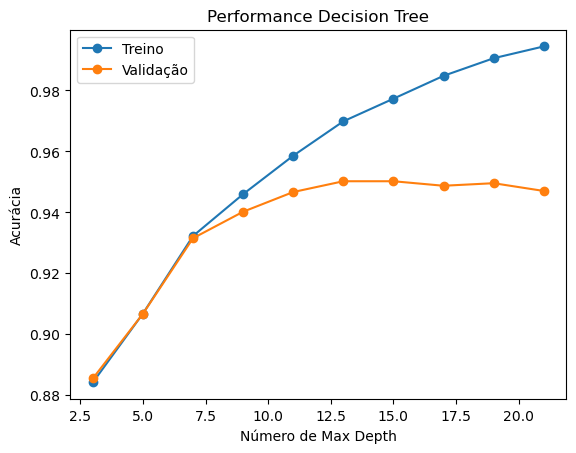

In [13]:
# plotagem comparativa da acurácia com dados de treino e validação
plt.plot(max_depth, train_scores, '-o', label='Treino')
plt.plot(max_depth, valid_scores, '-o', label='Validação')
plt.xlabel("Número de Max Depth")
plt.ylabel("Acurácia")
plt.title("Performance Decision Tree")
plt.legend()
plt.show()

In [23]:
# criação de DataFrame para visualização dos dados
df_dt_classifier = pd.DataFrame(results)
df_dt_classifier.sort_values("Accuracy_valid", ascending=False).head(5)

,Max_depth,Accuracy_train,Accuracy_valid
6,15,0.977287,0.950191
5,13,0.969855,0.950191
8,19,0.990567,0.949548
7,17,0.984789,0.948711
9,21,0.994443,0.947006


In [25]:
# definição dos parâmetros para treinamento
dt_classifier = tree.DecisionTreeClassifier(max_depth=15)

# treinamento do algoritmo
dt_classifier = dt_classifier.fit(X_train, Y_train)

In [30]:
# predição em dados de treino, validação e teste
y_train_dt_classifier = dt_classifier.predict(X_train)
y_valid_dt_classifier = dt_classifier.predict(X_validation)
y_test_dt_classifier = dt_classifier.predict(X_test)

#### Metrics

In [31]:
# Dados de Treino

#acuracia
accuracy_train_clf = mt.accuracy_score(Y_train, y_train_dt_classifier)
#precisao
precision_train_clf = mt.precision_score(Y_train, y_train_dt_classifier)
#recall
recall_train_clf = mt.recall_score(Y_train, y_train_dt_classifier)
#f1_score
f1_train_clf = mt.f1_score(Y_train, y_train_dt_classifier)

# Dados de Validação

#acuracia
accuracy_valid_clf = mt.accuracy_score(Y_validation, y_valid_dt_classifier)
#precisao
precision_valid_clf = mt.precision_score(Y_validation, y_valid_dt_classifier)
#recall
recall_valid_clf = mt.recall_score(Y_validation, y_valid_dt_classifier)
#f1_score
f1_valid_clf = mt.f1_score(Y_validation, y_valid_dt_classifier)

# Dados de Teste

#acuracia
accuracy_test_clf = mt.accuracy_score(Y_test, y_test_dt_classifier)
#precisao
precision_test_clf = mt.precision_score(Y_test, y_test_dt_classifier)
#recall
recall_test_clf = mt.recall_score(Y_test, y_test_dt_classifier)
#f1_score
f1_test_clf = mt.f1_score(Y_test, y_test_dt_classifier)

### Random Forest

In [35]:
# verificação dos melhores parâmetros do treinamento
max_depth = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
estimators = [50, 100, 200, 300, 500]
results = []

for depth in max_depth:
    for n in estimators:
        rf_classifier = RandomForestClassifier(max_depth=depth, n_estimators=n, random_state=42, n_jobs=-1)
        rf_classifier.fit(X_train, Y_train.values.ravel())
        
        y_pred_train = rf_classifier.predict(X_train)
        acc_train_scor = mt.accuracy_score(Y_train, y_pred_train)
        
        y_pred_valid = rf_classifier.predict(X_validation)
        acc_valid_scor = mt.accuracy_score(Y_validation, y_pred_valid)

        results.append({
            "Max_depth": depth,
            "N_estimators": n,
            "Accuracy_train": acc_train_scor,
            "Accuracy_valid": acc_valid_scor
        })

In [36]:
# criação de DataFrame para visualização dos dados
df_rf_classifier = pd.DataFrame(results)
df_rf_classifier.sort_values("Accuracy_valid", ascending=False).head(5)

,Max_depth,N_estimators,Accuracy_train,Accuracy_valid
44,19,500,0.994443,0.962161
49,21,500,0.997545,0.962129
43,19,300,0.994429,0.962097
48,21,300,0.997504,0.962000
41,19,100,0.993946,0.961614


In [37]:
# definição dos parâmetros para treinamento
rf_classifier = RandomForestClassifier(max_depth=19, n_estimators=500, random_state=42, n_jobs=-1)

# treinamento do algoritmo
rf_classifier = rf_classifier.fit(X_train, Y_train.values.ravel())

In [39]:
# predição em dados de treino, validação e teste
y_train_rf_classifier = rf_classifier.predict(X_train)
y_valid_rf_classifier = rf_classifier.predict(X_validation)
y_test_rf_classifier = rf_classifier.predict(X_test)

#### Metrics

In [40]:
# Dados de Treino

#acuracia
accuracy_train_rfc = mt.accuracy_score(Y_train, y_train_rf_classifier)
#precisao
precision_train_rfc = mt.precision_score(Y_train, y_train_rf_classifier)
#recall
recall_train_rfc = mt.recall_score(Y_train, y_train_rf_classifier)
#f1_score
f1_train_rfc = mt.f1_score(Y_train, y_train_rf_classifier)

# Dados de Validação

#acuracia
accuracy_valid_rfc = mt.accuracy_score(Y_validation, y_valid_rf_classifier)
#precisao
precision_valid_rfc = mt.precision_score(Y_validation, y_valid_rf_classifier)
#recall
recall_valid_rfc = mt.recall_score(Y_validation, y_valid_rf_classifier)
#f1_score
f1_valid_rfc = mt.f1_score(Y_validation, y_valid_rf_classifier)

# Dados de Teste

#acuracia
accuracy_test_rfc = mt.accuracy_score(Y_test, y_test_rf_classifier)
#precisao
precision_test_rfc = mt.precision_score(Y_test, y_test_rf_classifier)
#recall
recall_test_rfc = mt.recall_score(Y_test, y_test_rf_classifier)
#f1_score
f1_test_rfc = mt.f1_score(Y_test, y_test_rf_classifier)

### Logistic Regression

In [42]:
# verificação dos melhores parâmetros do treinamento
c_values = [0.001, 0.01, 0.1, 1, 10, 100]
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
max_iters = [50, 100, 150, 200, 250, 300]
results = []

for c in c_values:
    for s in solvers:
        for m in max_iters:
            lr = linear_model.LogisticRegression(C=c, solver=s, max_iter=m, )
            lr.fit(X_train, Y_train.values.ravel())
            
            y_pred_train = lr.predict(X_train)
            acc_train_scor = mt.accuracy_score(Y_train, y_pred_train)
    
            y_pred_valid = lr.predict(X_validation)
            acc_valid_scor = mt.accuracy_score(Y_validation, y_pred_valid)
    
            results.append({
                "C_values": c,
                "Solvers": s,
                "Max_iters": m,
                "Accuracy_train": acc_train_scor,
                "Accuracy_valid": acc_valid_scor
            })

\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
\\?\C:\

In [43]:
# criação de DataFrame para visualização dos dados
df_lr = pd.DataFrame(results)
df_lr.sort_values("Accuracy_valid", ascending=False).head(5)

,C_values,Solvers,Max_iters,Accuracy_train,Accuracy_valid
210,100.0,saga,50,0.875198,0.874256
203,100.0,newton-cholesky,300,0.875171,0.874159
213,100.0,saga,200,0.875171,0.874159
207,100.0,sag,200,0.875171,0.874159
212,100.0,saga,150,0.875143,0.874159


In [45]:
# definição dos parâmetros para treinamento
lr = linear_model.LogisticRegression(C=100, solver='saga', max_iter=50)

# treinamento do algoritmo
lr = lr.fit(X_train, Y_train.values.ravel())

\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [46]:
# predição em dados de treino, validação e teste
y_train_lr = lr.predict(X_train)
y_valid_lr = lr.predict(X_validation)
y_test_lr = lr.predict(X_test)

#### Metrics

In [47]:
# Dados de Treino

#acuracia
accuracy_train_lr = mt.accuracy_score(Y_train, y_train_lr)
#precisao
precision_train_lr = mt.precision_score(Y_train, y_train_lr)
#recall
recall_train_lr = mt.recall_score(Y_train, y_train_lr)
#f1_score
f1_train_lr = mt.f1_score(Y_train, y_train_lr)

# Dados de Validação

#acuracia
accuracy_valid_lr = mt.accuracy_score(Y_validation, y_valid_lr)
#precisao
precision_valid_lr = mt.precision_score(Y_validation, y_valid_lr)
#recall
recall_valid_lr = mt.recall_score(Y_validation, y_valid_lr)
#f1_score
f1_valid_lr = mt.f1_score(Y_validation, y_valid_lr)

# Dados de Teste

#acuracia
accuracy_test_lr = mt.accuracy_score(Y_test, y_test_lr)
#precisao
precision_test_lr = mt.precision_score(Y_test, y_test_lr)
#recall
recall_test_lr = mt.recall_score(Y_test, y_test_lr)
#f1_score
f1_test_lr = mt.f1_score(Y_test, y_test_lr)

## Classification Results

#### Train

In [48]:
#armazenamento e visualização dos resultados
train_results_clf = [
    
    {
        "Algoritmo": "KNN",
        "Accuracy": accuracy_train_knn,
        "Precision": precision_train_knn,
        "Recall": recall_train_knn,
        "F1_Score": f1_train_knn
    },
    
    {
        "Algoritmo": "Decision_Tree",
        "Accuracy": accuracy_train_clf,
        "Precision": precision_train_clf,
        "Recall": recall_train_clf,
        "F1_Score": f1_train_clf
    },
    
    {
        "Algoritmo": "Random_Forest",
        "Accuracy": accuracy_train_rfc,
        "Precision": precision_train_rfc,
        "Recall": recall_train_rfc,
        "F1_Score": f1_train_rfc
    },
    
    {
        "Algoritmo": "Logistic_Regression",
        "Accuracy": accuracy_train_lr,
        "Precision": precision_train_lr,
        "Recall": recall_train_lr,
        "F1_Score": f1_train_lr
    }
    
]

df_train_results_clf = pd.DataFrame(train_results_clf)
df_train_results_clf

,Algoritmo,Accuracy,Precision,Recall,F1_Score
0,KNN,0.934055,0.964572,0.880171,0.920441
1,Decision_Tree,0.977329,0.989418,0.957936,0.973422
2,Random_Forest,0.994443,0.998074,0.989086,0.993560
3,Logistic_Regression,0.875184,0.870763,0.836102,0.853080


#### Valid

In [49]:
#armazenamento e visualização dos resultados
valid_results_clf = [
    
    {
        "Algoritmo": "KNN",
        "Accuracy": accuracy_valid_knn,
        "Precision": precision_valid_knn,
        "Recall": recall_valid_knn,
        "F1_Score": f1_valid_knn
    },
    
    {
        "Algoritmo": "Decision_Tree",
        "Accuracy": accuracy_valid_clf,
        "Precision": precision_valid_clf,
        "Recall": recall_valid_clf,
        "F1_Score": f1_valid_clf
    },

    {
        "Algoritmo": "Random_Forest",
        "Accuracy": accuracy_valid_rfc,
        "Precision": precision_valid_rfc,
        "Recall": recall_valid_rfc,
        "F1_Score": f1_valid_rfc
    },

    {
        "Algoritmo": "Logistic_Regression",
        "Accuracy": accuracy_valid_lr,
        "Precision": precision_valid_lr,
        "Recall": recall_valid_lr,
        "F1_Score": f1_valid_lr
    }
    
]

df_valid_results_clf = pd.DataFrame(valid_results_clf)
df_valid_results_clf

,Algoritmo,Accuracy,Precision,Recall,F1_Score
0,KNN,0.926510,0.957389,0.869107,0.911115
1,Decision_Tree,0.950674,0.956339,0.928577,0.942253
2,Random_Forest,0.962161,0.970455,0.941347,0.955680
3,Logistic_Regression,0.874224,0.869454,0.835177,0.851971


#### Test

In [50]:
#armazenamento e visualização dos resultados
test_results_clf = [
    
    {
        "Algoritmo": "KNN",
        "Accuracy": accuracy_test_knn,
        "Precision": precision_test_knn,
        "Recall": recall_test_knn,
        "F1_Score": f1_test_knn
    },
    {
        "Algoritmo": "Decision_Tree",
        "Accuracy": accuracy_test_clf,
        "Precision": precision_test_clf,
        "Recall": recall_test_clf,
        "F1_Score": f1_test_clf
    },

    {
        "Algoritmo": "Random_Forest",
        "Accuracy": accuracy_test_rfc,
        "Precision": precision_test_rfc,
        "Recall": recall_test_rfc,
        "F1_Score": f1_test_rfc
    },

    {
        "Algoritmo": "Logistic_Regression",
        "Accuracy": accuracy_test_lr,
        "Precision": precision_test_lr,
        "Recall": recall_test_lr,
        "F1_Score": f1_test_lr
    }
    
]

df_test_results_clf = pd.DataFrame(test_results_clf)
df_test_results_clf

,Algoritmo,Accuracy,Precision,Recall,F1_Score
0,KNN,0.924999,0.955173,0.869952,0.910573
1,Decision_Tree,0.950527,0.957283,0.928729,0.942790
2,Random_Forest,0.961959,0.969853,0.942631,0.956048
3,Logistic_Regression,0.871510,0.868310,0.833700,0.850653


## Regression Algorithms

### Load Data

In [39]:
# dados de treino, validação e teste
X_train = pd.read_csv('regressao\\X_training.csv')
Y_train = pd.read_csv('regressao\\y_training.csv')

X_validation = pd.read_csv('regressao\\X_validation.csv')
Y_validation = pd.read_csv('regressao\\Y_val.csv')

X_test = pd.read_csv('regressao\\X_test.csv')
Y_test = pd.read_csv('regressao\\y_test.csv')

### Decision Tree Regressor

In [40]:
# verificação do melhor parâmetro do treinamento
max_depth = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
results = []
train_errors = []
valid_errors = []

for m in max_depth:
    dt_regressor = tree.DecisionTreeRegressor(max_depth=m, random_state=42)
    dt_regressor.fit(X_train, Y_train.values.ravel())

    y_pred_train = dt_regressor.predict(X_train)
    mae_train = mt.mean_absolute_error(Y_train, y_pred_train)
    train_errors.append(mae_train)
    
    y_pred_valid = dt_regressor.predict(X_validation)
    mae_valid = mt.mean_absolute_error(Y_validation, y_pred_valid)
    valid_errors.append(mae_valid)

    results.append({'Max_depth':  m,
                    'Mae_train': mae_train,
                    'Mae_valid': mae_valid
                      })

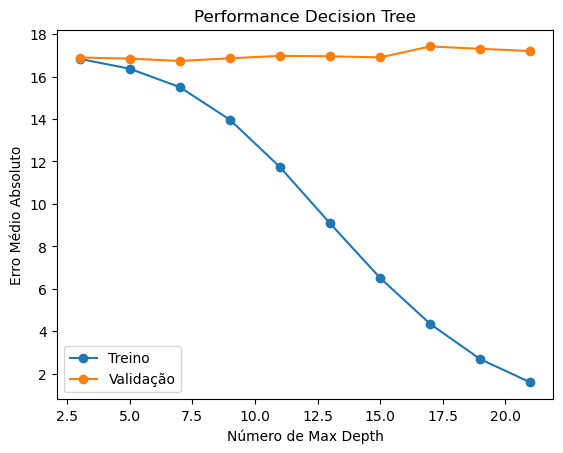

In [41]:
# plotagem comparativa do MAE com dados de treino e validação
plt.plot(max_depth, train_errors, '-o', label='Treino')
plt.plot(max_depth, valid_errors, '-o', label='Validação')
plt.xlabel("Número de Max Depth")
plt.ylabel("Erro Médio Absoluto")
plt.title("Performance Decision Tree")
plt.legend()
plt.show()

In [42]:
# criação de DataFrame para visualização dos dados
df_dt_regressor = pd.DataFrame(results)
df_dt_regressor.sort_values('Mae_valid', ascending = True).head(5)

,Max_depth,Mae_train,Mae_valid
2,7,15.501285,16.733766
1,5,16.368766,16.843452
3,9,13.965698,16.859791
0,3,16.833243,16.896550
6,15,6.504184,16.901212


In [43]:
# definição dos parâmetros para treinamento
dt_regressor = tree.DecisionTreeRegressor(max_depth=7)

# treinamento do algoritmo
dt_regressor = dt_regressor.fit(X_train, Y_train)

In [44]:
# predição em dados de treino, validação e teste
y_train_dt_regressor = dt_regressor.predict(X_train)
y_valid_dt_regressor = dt_regressor.predict(X_validation)
y_test_dt_regressor = dt_regressor.predict(X_test)

#### Metrics

In [45]:
# Dados de Treino

#R2
r2_train_dtg = mt.r2_score(Y_train, y_train_dt_regressor)
#mse
mse_train_dtg = mt.mean_squared_error(Y_train, y_train_dt_regressor)
#rmse
rmse_train_dtg = mt.root_mean_squared_error(Y_train, y_train_dt_regressor)
#mae
mae_train_dtg = mt.mean_absolute_error(Y_train, y_train_dt_regressor)
#mape
mape_train_dtg = mt.mean_absolute_percentage_error(Y_train, y_train_dt_regressor)

# Dados de Validação

#R2
r2_valid_dtg = mt.r2_score(Y_validation, y_valid_dt_regressor)
#mse
mse_valid_dtg = mt.mean_squared_error(Y_validation, y_valid_dt_regressor)
#rmse
rmse_valid_dtg = mt.root_mean_squared_error(Y_validation, y_valid_dt_regressor)
#mae
mae_valid_dtg = mt.mean_absolute_error(Y_validation, y_valid_dt_regressor)
#mape
mape_valid_dtg = mt.mean_absolute_percentage_error(Y_validation, y_valid_dt_regressor)

# Dados de Teste

#R2
r2_test_dtg = mt.r2_score(Y_test, y_test_dt_regressor)
#mse
mse_test_dtg = mt.mean_squared_error(Y_test, y_test_dt_regressor)
#rmse
rmse_test_dtg = mt.root_mean_squared_error(Y_test, y_test_dt_regressor)
#mae
mae_test_dtg =  mt.mean_absolute_error(Y_test, y_test_dt_regressor)
#mape
mape_test_dtg =  mt.mean_absolute_percentage_error(Y_test, y_test_dt_regressor)

### Polynomial Regression

In [46]:
# verificação do melhor parâmetro do treinamento
degrees = [1, 2, 3]
results = []
mae_train_list = []
mae_valid_list = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_train)
    
    poly_reg = linear_model.LinearRegression()
    poly_reg.fit(X_poly, Y_train)

    y_pred_train = poly_reg.predict(poly.transform(X_train))
    mae_train = mt.mean_absolute_error(Y_train, y_pred_train)
    mae_train_list.append(mae_train)
    
    y_pred_valid = poly_reg.predict(poly.transform(X_validation))
    mae_valid = mt.mean_absolute_error(Y_validation, y_pred_valid)
    mae_valid_list.append(mae_valid)
    
    results.append({"degree": d, 
                    "Mae_train": mae_train, 
                    "Mae_valid": mae_valid
                   })

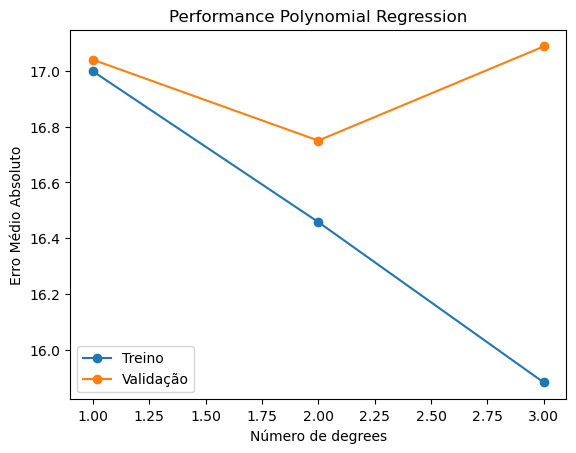

In [47]:
# plotagem comparativa do MAE com dados de treino e validação
plt.plot(degrees, mae_train_list, '-o', label='Treino')
plt.plot(degrees, mae_valid_list, '-o', label='Validação')
plt.xlabel("Número de degrees")
plt.ylabel("Erro Médio Absoluto")
plt.title("Performance Polynomial Regression")
plt.legend()
plt.show()

In [48]:
# criação de DataFrame para visualização dos dados
df_poly_reg = pd.DataFrame(results)
df_poly_reg.sort_values('Mae_valid', ascending = True).head(5)

,degree,Mae_train,Mae_valid
1,2,16.458032,16.749939
0,1,16.998249,17.039754
2,3,15.883592,17.087201


In [49]:
# definição dos parâmetros para treinamento
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)

# treinamento do algoritmo
poly_reg = linear_model.LinearRegression()
poly_reg = poly_reg.fit(X_poly_train, Y_train)

# aplicação da transformação
X_poly_valid = poly.transform(X_validation)
X_poly_test = poly.transform(X_test)

In [50]:
# predição em dados de treino, validação e teste
y_train_poly_reg = poly_reg.predict(X_poly_train)
y_valid_poly_reg = poly_reg.predict(X_poly_valid)
y_test_poly_reg = poly_reg.predict(X_poly_test)

#### Metrics

In [51]:
# Dados de Treino

#R2
r2_train_poly = mt.r2_score(Y_train, y_train_poly_reg)
#mse
mse_train_poly = mt.mean_squared_error(Y_train, y_train_poly_reg)
#rmse
rmse_train_poly = mt.root_mean_squared_error(Y_train, y_train_poly_reg)
#mae
mae_train_poly = mt.mean_absolute_error(Y_train, y_train_poly_reg)
#mape
mape_train_poly = mt.mean_absolute_percentage_error(Y_train, y_train_poly_reg)

# Dados de Validação

#R2
r2_valid_poly = mt.r2_score(Y_validation, y_valid_poly_reg)
#mse
mse_valid_poly = mt.mean_squared_error(Y_validation, y_valid_poly_reg)
#rmse
rmse_valid_poly = mt.root_mean_squared_error(Y_validation, y_valid_poly_reg)
#mae
mae_valid_poly = mt.mean_absolute_error(Y_validation, y_valid_poly_reg)
#mape
mape_valid_poly = mt.mean_absolute_percentage_error(Y_validation, y_valid_poly_reg)

# Dados de Teste
#R2
r2_test_poly = mt.r2_score(Y_test, y_test_poly_reg)
#mse
mse_test_poly = mt.mean_squared_error(Y_test, y_test_poly_reg)
#rmse
rmse_test_poly = mt.root_mean_squared_error(Y_test, y_test_poly_reg)
#mae
mae_test_poly =  mt.mean_absolute_error(Y_test, y_test_poly_reg)
#mape
mape_test_poly =  mt.mean_absolute_percentage_error(Y_test, y_test_poly_reg)

### Polynomial Regression Lasso

In [52]:
# verificação do melhor parâmetro do treinamento
degrees = [1, 2, 3]
alphas = [0.01, 0.1, 1, 10]
max_iters = [500, 1000, 1500]
results = []

for d in degrees:
    for a in alphas:
        for m in max_iters:
            poly = PolynomialFeatures(degree=d)
            X_poly = poly.fit_transform(X_train)
            
            poly_lasso = linear_model.Lasso(alpha=a, max_iter=m)
            poly_lasso.fit(X_poly, Y_train)
        
            y_pred_train = poly_lasso.predict(poly.transform(X_train))
            mae_train = mt.mean_absolute_error(Y_train, y_pred_train)
            
            y_pred_valid = poly_lasso.predict(poly.transform(X_validation))
            mae_valid = mt.mean_absolute_error(Y_validation, y_pred_valid)
            
            results.append({"degree": d,
                            "alpha": a,
                            "max_iter": m,
                            "Mae_train": mae_train, 
                            "Mae_valid": mae_valid
                           })

\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.231e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(
\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.176e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(
\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the nu

In [53]:
# criação de DataFrame para visualização dos dados
df_poly_lasso = pd.DataFrame(results)
df_poly_lasso.sort_values("Mae_valid", ascending=True).head(5)                                                              

,degree,alpha,max_iter,Mae_train,Mae_valid
14,2,0.01,1500,16.540954,16.732386
12,2,0.01,500,16.540954,16.732386
13,2,0.01,1000,16.540954,16.732386
26,3,0.01,1500,16.313619,16.785464
25,3,0.01,1000,16.315277,16.787444


In [54]:
# definição dos parâmetros para treinamento
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)

# treinamento do algoritmo
poly_lasso = linear_model.Lasso(alpha=0.01, max_iter=500)
poly_lasso = poly_lasso.fit(X_poly_train, Y_train)

# aplicação da transformação
X_poly_valid = poly.transform(X_validation)
X_poly_test = poly.transform(X_test)

In [55]:
# predição em dados de treino, validação e teste
y_train_poly_lasso = poly_lasso.predict(X_poly_train)
y_val_poly_lasso = poly_lasso.predict(X_poly_valid)
y_test_poly_lasso = poly_lasso.predict(X_poly_test)

#### Metrics

In [56]:
# Dados de Treino

#R2
r2_train_poly_lasso = mt.r2_score(Y_train, y_train_poly_lasso)
#mse
mse_train_poly_lasso = mt.mean_squared_error(Y_train, y_train_poly_lasso)
#rmse
rmse_train_poly_lasso = mt.root_mean_squared_error(Y_train, y_train_poly_lasso)
#mae
mae_train_poly_lasso = mt.mean_absolute_error(Y_train, y_train_poly_lasso)
#mape
mape_train_poly_lasso = mt.mean_absolute_percentage_error(Y_train, y_train_poly_lasso)

# Dados de Validação
#R2
r2_valid_poly_lasso = mt.r2_score(Y_validation, y_val_poly_lasso)
#mse
mse_valid_poly_lasso = mt.mean_squared_error(Y_validation, y_val_poly_lasso)
#rmse
rmse_valid_poly_lasso = mt.root_mean_squared_error(Y_validation, y_val_poly_lasso)
#mae
mae_valid_poly_lasso = mt.mean_absolute_error(Y_validation, y_val_poly_lasso)
#mape
mape_valid_poly_lasso = mt.mean_absolute_percentage_error(Y_validation, y_val_poly_lasso)

# Dados de Teste
#R2
r2_test_poly_lasso = mt.r2_score(Y_test, y_test_poly_lasso)
#mse
mse_test_poly_lasso = mt.mean_squared_error(Y_test, y_test_poly_lasso)
#rmse
rmse_test_poly_lasso = mt.root_mean_squared_error(Y_test, y_test_poly_lasso)
#mae
mae_test_poly_lasso =  mt.mean_absolute_error(Y_test, y_test_poly_lasso)
#mape
mape_test_poly_lasso =  mt.mean_absolute_percentage_error(Y_test, y_test_poly_lasso)

### Polynomial Regression Ridge

In [57]:
# verificação do melhor parâmetro do treinamento
degrees = [1, 2, 3]
alphas = [0.01, 0.1, 1, 10]
max_iters = [500, 1000, 1500]
results = []

for d in degrees:
    for a in alphas:
        for m in max_iters:
            poly = PolynomialFeatures(degree=d)
            X_poly = poly.fit_transform(X_train)
            
            poly_ridge = linear_model.Ridge(alpha=a, max_iter=m)
            poly_ridge.fit(X_poly, Y_train)
        
            y_pred_train = poly_ridge.predict(poly.transform(X_train))
            mae_train = mt.mean_absolute_error(Y_train, y_pred_train)
            
            y_pred_valid = poly_ridge.predict(poly.transform(X_validation))
            mae_valid = mt.mean_absolute_error(Y_validation, y_pred_valid)
            
            results.append({"degree": d,
                            "alpha": a,
                            "max_iter": m,
                            "Mae_train": mae_train, 
                            "Mae_valid": mae_valid
                           })

In [58]:
# criação de DataFrame para visualização dos dados
df_poly_ridge = pd.DataFrame(results)
df_poly_ridge.sort_values("Mae_valid", ascending=True).head(5)                                                              

,degree,alpha,max_iter,Mae_train,Mae_valid
18,2,1.0,500,16.471972,16.738741
20,2,1.0,1500,16.471972,16.738741
19,2,1.0,1000,16.471972,16.738741
15,2,0.1,500,16.459988,16.741767
17,2,0.1,1500,16.459988,16.741767


In [59]:
# definição dos parâmetros para treinamento
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)

# definição dos parâmetros para treinamento
poly_ridge = linear_model.Ridge(alpha=10.0, max_iter=500)

# treinamento do algoritmo
poly_ridge = poly_ridge.fit(X_poly_train, Y_train)

# aplicação da transformação
X_poly_valid = poly.transform(X_validation)
X_poly_test = poly.transform(X_test)

In [60]:
# predição em dados de treino, validação e teste
y_train_poly_ridge = poly_ridge.predict(X_poly_train)
y_val_poly_ridge = poly_ridge.predict(X_poly_valid)
y_test_poly_ridge = poly_ridge.predict(X_poly_test)

#### Metrics

In [61]:
# Dados de Treino

#R2
r2_train_poly_ridge = mt.r2_score(Y_train, y_train_poly_ridge)
#mse
mse_train_poly_ridge = mt.mean_squared_error(Y_train, y_train_poly_ridge)
#rmse
rmse_train_poly_ridge = mt.root_mean_squared_error(Y_train, y_train_poly_ridge)
#mae
mae_train_poly_ridge = mt.mean_absolute_error(Y_train, y_train_poly_ridge)
#mape
mape_train_poly_ridge = mt.mean_absolute_percentage_error(Y_train, y_train_poly_ridge)

# Dados de Validação
#R2
r2_valid_poly_ridge = mt.r2_score(Y_validation, y_val_poly_ridge)
#mse
mse_valid_poly_ridge = mt.mean_squared_error(Y_validation, y_val_poly_ridge)
#rmse
rmse_valid_poly_ridge = mt.root_mean_squared_error(Y_validation, y_val_poly_ridge)
#mae
mae_valid_poly_ridge = mt.mean_absolute_error(Y_validation, y_val_poly_ridge)
#mape
mape_valid_poly_ridge = mt.mean_absolute_percentage_error(Y_validation, y_val_poly_ridge)

# Dados de Teste

#R2
r2_test_poly_ridge = mt.r2_score(Y_test, y_test_poly_ridge)
#mse
mse_test_poly_ridge = mt.mean_squared_error(Y_test, y_test_poly_ridge)
#rmse
rmse_test_poly_ridge = mt.root_mean_squared_error(Y_test, y_test_poly_ridge)
#mae
mae_test_poly_ridge =  mt.mean_absolute_error(Y_test, y_test_poly_ridge)
#mape
mape_test_poly_ridge =  mt.mean_absolute_percentage_error(Y_test, y_test_poly_ridge)

### Polynomial Regression Elastic Net

In [62]:
# verificação do melhor parâmetro do treinamento
degrees = [1, 2, 3]
alphas = [0.01, 0.1, 1, 10]
max_iters = [500, 1000, 1500]
ratios = [0, 0.5, 1]
results = []

for d in degrees:
    for a in alphas:
        for m in max_iters:
            for r in ratios:
                poly = PolynomialFeatures(degree=d)
                X_poly = poly.fit_transform(X_train)
                
                poly_elastic = linear_model.ElasticNet(alpha=a,  l1_ratio=r, max_iter=m)
                poly_elastic.fit(X_poly, Y_train)
            
                y_pred_train = poly_elastic.predict(poly.transform(X_train))
                mae_train = mt.mean_absolute_error(Y_train, y_pred_train)
                
                y_pred_valid = poly_elastic.predict(poly.transform(X_validation))
                mae_valid = mt.mean_absolute_error(Y_validation, y_pred_valid)
                
                results.append({"degree": d,
                                "alpha": a,
                                "l1_ratio": r,
                                "max_iter": m,
                                "Mae_train": mae_train, 
                                "Mae_valid": mae_valid
                               })

\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.426e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.426e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term

In [63]:
# criação de DataFrame para visualização dos dados
df_poly_elastic = pd.DataFrame(results)
df_poly_elastic.sort_values("Mae_valid", ascending=True).head(5)                                                              

,degree,alpha,l1_ratio,max_iter,Mae_train,Mae_valid
41,2,0.01,1.0,1000,16.540954,16.732386
44,2,0.01,1.0,1500,16.540954,16.732386
38,2,0.01,1.0,500,16.540954,16.732386
37,2,0.01,0.5,500,16.608354,16.771713
43,2,0.01,0.5,1500,16.608354,16.771713


In [64]:
# definição dos parâmetros para treinamento
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)

# definição dos parâmetros para treinamento
poly_elastic = linear_model.ElasticNet(alpha=0.01, l1_ratio= 1.0, max_iter=500)

# treinamento do algoritmo
poly_elastic = poly_elastic.fit(X_poly_train, Y_train)

# aplicação da transformação
X_poly_valid = poly.transform(X_validation)
X_poly_test = poly.transform(X_test)

In [65]:
# predição em dados de treino, validação e teste
y_train_poly_elastic = poly_elastic.predict(X_poly_train)
y_val_poly_elastic = poly_elastic.predict(X_poly_valid)
y_test_poly_elastic = poly_elastic.predict(X_poly_test)

#### Metrics

In [66]:
# Dados de Treino

#R2
r2_train_poly_elasticnet = mt.r2_score(Y_train, y_train_poly_elastic)
#mse
mse_train_poly_elasticnet = mt.mean_squared_error(Y_train, y_train_poly_elastic)
#rmse
rmse_train_poly_elasticnet = mt.root_mean_squared_error(Y_train, y_train_poly_elastic)
#mae
mae_train_poly_elasticnet = mt.mean_absolute_error(Y_train, y_train_poly_elastic)
#mape
mape_train_poly_elasticnet = mt.mean_absolute_percentage_error(Y_train, y_train_poly_elastic)

# Dados de Validação

#R2
r2_valid_poly_elasticnet = mt.r2_score(Y_validation, y_val_poly_elastic)
#mse
mse_valid_poly_elasticnet = mt.mean_squared_error(Y_validation, y_val_poly_elastic)
#rmse
rmse_valid_poly_elasticnet = mt.root_mean_squared_error(Y_validation, y_val_poly_elastic)
#mae
mae_valid_poly_elasticnet = mt.mean_absolute_error(Y_validation, y_val_poly_elastic)
#mape
mape_valid_poly_elasticnet = mt.mean_absolute_percentage_error(Y_validation, y_val_poly_elastic)

# Dados de Teste

#R2
r2_test_poly_elasticnet = mt.r2_score(Y_test, y_test_poly_elastic)
#mse
mse_test_poly_elasticnet = mt.mean_squared_error(Y_test, y_test_poly_elastic)
#rmse
rmse_test_poly_elasticnet = mt.root_mean_squared_error(Y_test, y_test_poly_elastic)
#mae
mae_test_poly_elasticnet =  mt.mean_absolute_error(Y_test, y_test_poly_elastic)
#mape
mape_test_poly_elasticnet =  mt.mean_absolute_percentage_error(Y_test, y_test_poly_elastic)

### Random Forest Regressor

In [67]:
# verificação do melhor parâmetro do treinamento
max_depth = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
estimators = [50, 100, 200, 300, 500]
results = []

for depth in max_depth:
    for n in estimators:
        rf_regressor = RandomForestRegressor(max_depth=depth, n_estimators=n, random_state=42, n_jobs=-1)
        rf_regressor.fit(X_train, Y_train.values.ravel())
        
        y_pred_train = rf_regressor.predict(X_train)
        mae_train = mt.mean_absolute_error(Y_train, y_pred_train)
        
        y_pred_valid = rf_regressor.predict(X_validation)
        mae_valid = mt.mean_absolute_error(Y_validation, y_pred_valid)

        results.append({
            "Max_depth": depth,
            "N_estimators": n,
            "Mae_train": mae_train,
            "Mae_valid": mae_valid
        })

In [68]:
# criação de DataFrame para visualização dos dados
df_rf_regressor = pd.DataFrame(results)
df_rf_regressor.sort_values("Mae_valid", ascending=True).head(5)

,Max_depth,N_estimators,Mae_train,Mae_valid
48,21,300,5.275103,13.051238
49,21,500,5.271162,13.061459
47,21,200,5.295480,13.069013
46,21,100,5.323901,13.147187
43,19,300,5.757467,13.191871


In [69]:
# definição dos parâmetros para treinamento
rf_regressor = RandomForestRegressor(max_depth=21, n_estimators=300, random_state=42, n_jobs=-1)

# treinamento do algoritmo
rf_regressor = rf_regressor.fit(X_train, Y_train.values.ravel())

In [70]:
# predição em dados de treino, validação e teste
y_train_rf_regressor = rf_regressor.predict(X_train)
y_valid_rf_regressor = rf_regressor.predict(X_validation)
y_test_rf_regressor = rf_regressor.predict(X_test)

#### Metrics

In [71]:
# Dados de Treino

#R2
r2_train_rfr = mt.r2_score(Y_train, y_train_rf_regressor)
#mse
mse_train_rfr = mt.mean_squared_error(Y_train, y_train_rf_regressor)
#rmse
rmse_train_rfr = mt.root_mean_squared_error(Y_train, y_train_rf_regressor)
#mae
mae_train_rfr = mt.mean_absolute_error(Y_train, y_train_rf_regressor)
#mape
mape_train_rfr = mt.mean_absolute_percentage_error(Y_train, y_train_rf_regressor)

# Dados de Validação

#R2
r2_valid_rfr = mt.r2_score(Y_validation, y_valid_rf_regressor)
#mse
mse_valid_rfr = mt.mean_squared_error(Y_validation, y_valid_rf_regressor)
#rmse
rmse_valid_rfr = mt.root_mean_squared_error(Y_validation, y_valid_rf_regressor)
#mae
mae_valid_rfr = mt.mean_absolute_error(Y_validation, y_valid_rf_regressor)
#mape
mape_valid_rfr = mt.mean_absolute_percentage_error(Y_validation, y_valid_rf_regressor)

# Dados de Teste

#R2
r2_test_rfr = mt.r2_score(Y_test, y_test_rf_regressor)
#mse
mse_test_rfr = mt.mean_squared_error(Y_test, y_test_rf_regressor)
#rmse
rmse_test_rfr = mt.root_mean_squared_error(Y_test, y_test_rf_regressor)
#mae
mae_test_rfr = mt.mean_absolute_error(Y_test, y_test_rf_regressor)
#mape
mape_test_rfr =  mt.mean_absolute_percentage_error(Y_test, y_test_rf_regressor)

### Linear Regression Lasso

In [72]:
# verificação do melhor parâmetro do treinamento
alphas = [0.01, 0.1, 1, 10]
max_iters = [500, 1000, 1500]
results = []

for a in alphas:
    for m in max_iters:      
        reg_lasso = linear_model.Lasso(alpha=a, max_iter=m)
        reg_lasso.fit(X_train, Y_train)
    
        y_pred_train = reg_lasso.predict(X_train)
        mae_train = mt.mean_absolute_error(Y_train, y_pred_train)
        
        y_pred_valid = reg_lasso.predict(X_validation)
        mae_valid = mt.mean_absolute_error(Y_validation, y_pred_valid)
        
        results.append({"alpha": a,
                        "max_iter": m,
                        "Mae_train": mae_train, 
                        "Mae_valid": mae_valid
                       })

In [73]:
# criação de DataFrame para visualização dos dados
df_reg_lasso = pd.DataFrame(results)
df_reg_lasso.sort_values("Mae_valid", ascending=True).head(5)                                                              

,alpha,max_iter,Mae_train,Mae_valid
0,0.01,500,17.002115,17.038243
1,0.01,1000,17.002115,17.038243
2,0.01,1500,17.002115,17.038243
3,0.10,500,17.046776,17.047448
4,0.10,1000,17.046776,17.047448


In [74]:
# definição dos parâmetros para treinamento
reg_lasso = linear_model.Lasso(alpha=0.01, max_iter=500)

# treinamento do algoritmo
reg_lasso = reg_lasso.fit(X_train, Y_train)

In [75]:
# predição em dados de treino, validação e teste
y_train_reg_lasso = reg_lasso.predict(X_train)
y_val_reg_lasso = reg_lasso.predict(X_validation)
y_test_reg_lasso = reg_lasso.predict(X_test)

#### Metrics

In [76]:
# Dados de Treino

#R2
r2_train_lasso = mt.r2_score(Y_train, y_train_reg_lasso)
#mse
mse_train_lasso = mt.mean_squared_error(Y_train, y_train_reg_lasso)
#rmse
rmse_train_lasso = mt.root_mean_squared_error(Y_train, y_train_reg_lasso)
#mae
mae_train_lasso = mt.mean_absolute_error(Y_train, y_train_reg_lasso)
#mape
mape_train_lasso = mt.mean_absolute_percentage_error(Y_train, y_train_reg_lasso)

# Dados de Validação

#R2
r2_valid_lasso = mt.r2_score(Y_validation, y_val_reg_lasso)
#mse
mse_valid_lasso = mt.mean_squared_error(Y_validation, y_val_reg_lasso)
#rmse
rmse_valid_lasso = mt.root_mean_squared_error(Y_validation, y_val_reg_lasso)
#mae
mae_valid_lasso = mt.mean_absolute_error(Y_validation, y_val_reg_lasso)
#mape
mape_valid_lasso = mt.mean_absolute_percentage_error(Y_validation, y_val_reg_lasso)


# Dados de Teste

#R2
r2_test_lasso = mt.r2_score(Y_test, y_test_reg_lasso)
#mse
mse_test_lasso = mt.mean_squared_error(Y_test, y_test_reg_lasso)
#rmse
rmse_test_lasso = mt.root_mean_squared_error(Y_test, y_test_reg_lasso)
#mae
mae_test_lasso = mt.mean_absolute_error(Y_test, y_test_reg_lasso)
#mape
mape_test_lasso =  mt.mean_absolute_percentage_error(Y_test, y_test_reg_lasso)

### Linear Regression Ridge

In [77]:
# verificação do melhor parâmetro do treinamento
alphas = [0.01, 0.1, 1, 10]
max_iters = [500, 1000, 1500]
results = []

for a in alphas:
    for m in max_iters:      
        reg_ridge = linear_model.Ridge(alpha=a, max_iter=m)
        reg_ridge.fit(X_train, Y_train)
    
        y_pred_train = reg_ridge.predict(X_train)
        mae_train = mt.mean_absolute_error(Y_train, y_pred_train)
        
        y_pred_valid = reg_ridge.predict(X_validation)
        mae_valid = mt.mean_absolute_error(Y_validation, y_pred_valid)
        
        results.append({"alpha": a,
                        "max_iter": m,
                        "Mae_train": mae_train, 
                        "Mae_valid": mae_valid
                       })

In [78]:
# criação de DataFrame para visualização dos dados
df_reg_ridge = pd.DataFrame(results)
df_reg_ridge.sort_values("Mae_valid", ascending=True).head(5)                                                              

,alpha,max_iter,Mae_train,Mae_valid
10,10.0,1000,16.999135,17.037610
11,10.0,1500,16.999135,17.037610
9,10.0,500,16.999135,17.037610
6,1.0,500,16.998308,17.039472
8,1.0,1500,16.998308,17.039472


In [79]:
# definição dos parâmetros para treinamento
reg_ridge = linear_model.Ridge(alpha=10.0, max_iter=500)

# treinamento do algoritmo
reg_ridge = reg_ridge.fit(X_train, Y_train)

In [80]:
# predição em dados de treino, validação e teste
y_train_ridge = reg_ridge.predict(X_train)
y_valid_ridge = reg_ridge.predict(X_validation)
y_test_ridge = reg_ridge.predict(X_test)

#### Metrics

In [81]:
# Dados de Treino

#R2
r2_train_ridge = mt.r2_score(Y_train, y_train_ridge)
#mse
mse_train_ridge = mt.mean_squared_error(Y_train, y_train_ridge)
#rmse
rmse_train_ridge = mt.root_mean_squared_error(Y_train, y_train_ridge)
#mae
mae_train_ridge = mt.mean_absolute_error(Y_train, y_train_ridge)
#mape
mape_train_ridge = mt.mean_absolute_percentage_error(Y_train, y_train_ridge)

# Dados de Validação

#R2
r2_valid_ridge = mt.r2_score(Y_validation, y_valid_ridge)
#mse
mse_valid_ridge = mt.mean_squared_error(Y_validation, y_valid_ridge)
#rmse
rmse_valid_ridge = mt.root_mean_squared_error(Y_validation, y_valid_ridge)
#mae
mae_valid_ridge = mt.mean_absolute_error(Y_validation, y_valid_ridge)
#mape
mape_valid_ridge = mt.mean_absolute_percentage_error(Y_validation, y_valid_ridge)


# Dados de Teste

#R2
r2_test_ridge = mt.r2_score(Y_test, y_test_ridge)
#mse
mse_test_ridge = mt.mean_squared_error(Y_test, y_test_ridge)
#rmse
rmse_test_ridge = mt.root_mean_squared_error(Y_test, y_test_ridge)
#mae
mae_test_ridge = mt.mean_absolute_error(Y_test, y_test_ridge)
#mape
mape_test_ridge =  mt.mean_absolute_percentage_error(Y_test, y_test_ridge)

### Linear Regression Elastic Net

In [82]:
# verificação do melhor parâmetro do treinamento
alphas = [0.01, 0.1, 1, 10]
ratios = [0, 0.5, 1]
max_iters = [500, 1000, 1500]
results = []

for a in alphas:
    for r in ratios:
        for m in max_iters:      
            reg_elastic = linear_model.ElasticNet(alpha=a, l1_ratio=r, max_iter=m)
            reg_elastic.fit(X_train, Y_train)
        
            y_pred_train = reg_elastic.predict(X_train)
            mae_train = mt.mean_absolute_error(Y_train, y_pred_train)
            
            y_pred_valid = reg_elastic.predict(X_validation)
            mae_valid = mt.mean_absolute_error(Y_validation, y_pred_valid)
            
            results.append({"alpha": a,
                            "l1_ratio": r,
                            "max_iter": m,
                            "Mae_train": mae_train, 
                            "Mae_valid": mae_valid
                           })

\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.426e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.426e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term

In [83]:
# criação de DataFrame para visualização dos dados
df_reg_elastic = pd.DataFrame(results)
df_reg_elastic.sort_values("Mae_valid", ascending=True).head(5)                                                              

,alpha,l1_ratio,max_iter,Mae_train,Mae_valid
3,0.01,0.5,500,17.008724,17.034078
4,0.01,0.5,1000,17.008724,17.034078
5,0.01,0.5,1500,17.008724,17.034078
0,0.01,0.0,500,17.017878,17.034948
2,0.01,0.0,1500,17.017878,17.034948


In [84]:
# definição dos parâmetros para treinamento
reg_elastic = linear_model.ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=500)

# treinamento do algoritmo
reg_elastic = reg_elastic.fit(X_train, Y_train)

In [85]:
# predição em dados de treino, validação e teste
y_train_reg_elastic = reg_elastic.predict(X_train)
y_val_reg_elastic = reg_elastic.predict(X_validation)
y_test_reg_elastic = reg_elastic.predict(X_test)

#### Metrics

In [86]:
# Dados de Treino

#R2
r2_train_elastic = mt.r2_score(Y_train, y_train_reg_elastic)
#mse
mse_train_elastic = mt.mean_squared_error(Y_train, y_train_reg_elastic)
#rmse
rmse_train_elastic = mt.root_mean_squared_error(Y_train, y_train_reg_elastic)
#mae
mae_train_elastic = mt.mean_absolute_error(Y_train, y_train_reg_elastic)
#mape
mape_train_elastic = mt.mean_absolute_percentage_error(Y_train, y_train_reg_elastic)

# Dados de Validação

#R2
r2_valid_elastic = mt.r2_score(Y_validation, y_val_reg_elastic)
#mse
mse_valid_elastic = mt.mean_squared_error(Y_validation, y_val_reg_elastic)
#rmse
rmse_valid_elastic = mt.root_mean_squared_error(Y_validation, y_val_reg_elastic)
#mae
mae_valid_elastic = mt.mean_absolute_error(Y_validation, y_val_reg_elastic)
#mape
mape_valid_elastic = mt.mean_absolute_percentage_error(Y_validation, y_val_reg_elastic)

# Dados de Teste

#R2
r2_test_elastic = mt.r2_score(Y_test, y_test_reg_elastic)
#mse
mse_test_elastic = mt.mean_squared_error(Y_test, y_test_reg_elastic)
#rmse
rmse_test_elastic = mt.root_mean_squared_error(Y_test, y_test_reg_elastic)
#mae
mae_test_elastic = mt.mean_absolute_error(Y_test, y_test_reg_elastic)
#mape
mape_test_elastic =  mt.mean_absolute_percentage_error(Y_test, y_test_reg_elastic)

## Regression Results

#### Train

In [87]:
#armazenamento e visualização dos resultados
train_results_reg = [
    
    {
        "Algoritmo": "Decision Tree Regressor",
        "R2": r2_train_dtg,
        "MSE": mse_train_dtg,
        "RMSE": rmse_train_dtg,
        "MAE": mae_train_dtg,
        "MAPE": mape_train_dtg
    },

    {
        "Algoritmo": "Polynomial Regression",
        "R2": r2_train_poly,
        "MSE": mse_train_poly,
        "RMSE": rmse_train_poly,
        "MAE": mae_train_poly,
        "MAPE": mape_train_poly
    },
    {
        "Algoritmo": "Polynomial Regression Lasso",
        "R2": r2_train_poly_lasso,
        "MSE": mse_train_poly_lasso,
        "RMSE": rmse_train_poly_lasso,
        "MAE": mae_train_poly_lasso,
        "MAPE": mape_train_poly_lasso
    },

    {
        "Algoritmo": "Polynomial Regression Ridge",
        "R2": r2_train_poly_ridge,
        "MSE": mse_train_poly_ridge,
        "RMSE": rmse_train_poly_ridge,
        "MAE": mae_train_poly_ridge,
        "MAPE": mape_train_poly_ridge
    },

    {
        "Algoritmo": "Polynomial Regression Elastic Net",
        "R2": r2_train_poly_elasticnet,
        "MSE": mse_train_poly_elasticnet,
        "RMSE": rmse_train_poly_elasticnet,
        "MAE": mae_train_poly_elasticnet,
        "MAPE": mape_train_poly_elasticnet
    },

    {
        "Algoritmo": "Random Forest Regressor",
        "R2": r2_train_rfr,
        "MSE": mse_train_rfr,
        "RMSE": rmse_train_rfr,
        "MAE": mae_train_rfr,
        "MAPE": mape_train_rfr
    },
    
    {
        "Algoritmo": "Linear Regression Lasso",
        "R2": r2_train_lasso,
        "MSE": mse_train_lasso,
        "RMSE": rmse_train_lasso,
        "MAE": mae_train_lasso,
        "MAPE": mape_train_lasso
    },

     {
        "Algoritmo": "Linear Regression Ridge",
        "R2": r2_train_ridge,
        "MSE": mse_train_ridge,
        "RMSE": rmse_train_ridge,
        "MAE": mae_train_ridge,
        "MAPE": mape_train_ridge
    },

    {
        "Algoritmo": "Linear Regression Elastic Net",
        "R2": r2_train_elastic,
        "MSE": mse_train_elastic,
        "RMSE": rmse_train_elastic,
        "MAE": mae_train_elastic,
        "MAPE": mape_train_elastic
    }
    
]

df_train_results_reg = pd.DataFrame(train_results_reg)
df_train_results_reg

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Decision Tree Regressor,0.191712,386.371959,19.656347,15.501285,6.535309
1,Polynomial Regression,0.094195,432.986210,20.808321,16.458032,8.350540
2,Polynomial Regression Lasso,0.086817,436.512957,20.892893,16.540954,8.432707
3,Polynomial Regression Ridge,0.089350,435.302181,20.863897,16.516938,8.416442
4,Polynomial Regression Elastic Net,0.086817,436.512957,20.892893,16.540954,8.432707
5,Random Forest Regressor,0.892104,51.575657,7.181619,5.275103,2.686783
6,Linear Regression Lasso,0.045930,456.057415,21.355501,17.002115,8.660670
7,Linear Regression Ridge,0.046009,456.019763,21.354619,16.999135,8.655245
8,Linear Regression Elastic Net,0.045055,456.475703,21.365292,17.008724,8.663312


#### Valid

In [88]:
#armazenamento e visualização dos resultados
valid_results_reg = [
    
    {
        "Algoritmo": "Decision Tree Regressor",
        "R2": r2_valid_dtg,
        "MSE": mse_valid_dtg,
        "RMSE": rmse_valid_dtg,
        "MAE": mae_valid_dtg,
        "MAPE": mape_valid_dtg
    },

    {
        "Algoritmo": "Polynomial Regression",
        "R2": r2_valid_poly,
        "MSE": mse_valid_poly,
        "RMSE": rmse_valid_poly,
        "MAE": mae_valid_poly,
        "MAPE": mape_valid_poly
    },

    {
        "Algoritmo": "Polynomial Regression Lasso",
        "R2": r2_valid_poly_lasso,
        "MSE": mse_valid_poly_lasso,
        "RMSE": rmse_valid_poly_lasso,
        "MAE": mae_valid_poly_lasso,
        "MAPE": mape_valid_poly_lasso
    },

    {
        "Algoritmo": "Polynomial Regression Ridge",
        "R2": r2_valid_poly_ridge,
        "MSE": mse_valid_poly_ridge,
        "RMSE": rmse_valid_poly_ridge,
        "MAE": mae_valid_poly_ridge,
        "MAPE": mape_valid_poly_ridge
    },

    {
        "Algoritmo": "Polynomial Regression Elastic Net",
        "R2": r2_valid_poly_elasticnet,
        "MSE": mse_valid_poly_elasticnet,
        "RMSE": rmse_valid_poly_elasticnet,
        "MAE": mae_valid_poly_elasticnet,
        "MAPE": mape_valid_poly_elasticnet
    },

    {
        "Algoritmo": "Random Forest Regressor",
        "R2": r2_valid_rfr,
        "MSE": mse_valid_rfr,
        "RMSE": rmse_valid_rfr,
        "MAE": mae_valid_rfr,
        "MAPE": mape_valid_rfr
    },

    {
        "Algoritmo": "Linear Regression Lasso",
        "R2": r2_valid_lasso,
        "MSE": mse_valid_lasso,
        "RMSE": rmse_valid_lasso,
        "MAE": mae_valid_lasso,
        "MAPE": mape_valid_lasso
    },

    {
        "Algoritmo": "Linear Regression Ridge",
        "R2": r2_valid_ridge,
        "MSE": mse_valid_ridge,
        "RMSE": rmse_valid_ridge,
        "MAE": mae_valid_ridge,
        "MAPE": mape_valid_ridge
    },

    {
        "Algoritmo": "Linear Regression Elastic Net",
        "R2": r2_valid_elastic,
        "MSE": mse_valid_elastic,
        "RMSE": rmse_valid_elastic,
        "MAE": mae_valid_elastic,
        "MAPE": mape_valid_elastic
    }
    
]

df_valid_results_reg = pd.DataFrame(valid_results_reg)
df_valid_results_reg

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Decision Tree Regressor,0.058925,449.374070,21.198445,16.722073,7.998204
1,Polynomial Regression,0.066477,445.768223,21.113224,16.749939,8.547931
2,Polynomial Regression Lasso,0.068473,444.814973,21.090637,16.732386,8.591033
3,Polynomial Regression Ridge,0.067245,445.401117,21.104528,16.744443,8.598288
4,Polynomial Regression Elastic Net,0.068473,444.814973,21.090637,16.732386,8.591033
5,Random Forest Regressor,0.337922,316.150129,17.780611,13.051238,7.083306
6,Linear Regression Lasso,0.039928,458.445407,21.411338,17.038243,8.686215
7,Linear Regression Ridge,0.039937,458.441098,21.411238,17.037610,8.681342
8,Linear Regression Elastic Net,0.039538,458.631708,21.415688,17.034078,8.679104


#### Test

In [89]:
#armazenamento e visualização dos resultados
test_results_reg = [
    
    {
        "Algoritmo": "Decision Tree Regressor",
        "R2": r2_test_dtg,
        "MSE": mse_test_dtg,
        "RMSE": rmse_test_dtg,
        "MAE": mae_test_dtg,
        "MAPE": mape_test_dtg
    },

    {
        "Algoritmo": "Polynomial Regression",
        "R2": r2_test_poly,
        "MSE": mse_test_poly,
        "RMSE": rmse_test_poly,
        "MAE": mae_test_poly,
        "MAPE": mape_test_poly
    },
    
    {
        "Algoritmo": "Polynomial Regression Lasso",
        "R2": r2_test_poly_lasso,
        "MSE": mse_test_poly_lasso,
        "RMSE": rmse_test_poly_lasso,
        "MAE": mae_test_poly_lasso,
        "MAPE": mape_test_poly_lasso
    },

    {
        "Algoritmo": "Polynomial Regression Ridge",
        "R2": r2_test_poly_ridge,
        "MSE": mse_test_poly_ridge,
        "RMSE": rmse_test_poly_ridge,
        "MAE": mae_test_poly_ridge,
        "MAPE": mape_test_poly_ridge
     },

    {
        "Algoritmo": "Polynomial Regression Elastic Net",
        "R2": r2_test_poly_elasticnet,
        "MSE": mse_test_poly_elasticnet,
        "RMSE": rmse_test_poly_elasticnet,
        "MAE": mae_test_poly_elasticnet,
        "MAPE": mape_test_poly_elasticnet
    },

    {
        "Algoritmo": "Random Forest Regressor",
        "R2": r2_test_rfr,
        "MSE": mse_test_rfr,
        "RMSE": rmse_test_rfr,
        "MAE": mae_test_rfr,
        "MAPE": mape_test_rfr
    },

    {
        "Algoritmo": "Linear Regression Lasso",
        "R2": r2_test_lasso,
        "MSE": mse_test_lasso,
        "RMSE": rmse_test_lasso,
        "MAE": mae_test_lasso,
        "MAPE": mape_test_lasso
    },

    {
        "Algoritmo": "Linear Regression Ridge",
        "R2": r2_test_ridge,
        "MSE": mse_test_ridge,
        "RMSE": rmse_test_ridge,
        "MAE": mae_test_ridge,
        "MAPE": mape_test_ridge
    },

    {
        "Algoritmo": "Linear Regression Elastic Net",
        "R2": r2_test_elastic,
        "MSE": mse_test_elastic,
        "RMSE": rmse_test_elastic,
        "MAE": mae_test_elastic,
        "MAPE": mape_test_elastic
    }
    
]

df_test_results_reg = pd.DataFrame(test_results_reg)
df_test_results_reg

,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Decision Tree Regressor,0.077105,449.358522,21.198078,16.859348,7.453973
1,Polynomial Regression,0.090079,443.041256,21.048545,16.720535,8.242464
2,Polynomial Regression Lasso,0.085899,445.076890,21.096846,16.760885,8.322458
3,Polynomial Regression Ridge,0.085592,445.226112,21.100382,16.767518,8.336865
4,Polynomial Regression Elastic Net,0.085899,445.076890,21.096846,16.760885,8.322458
5,Random Forest Regressor,0.355159,313.973538,17.719298,13.127484,6.583782
6,Linear Regression Lasso,0.051981,461.591607,21.484683,17.130186,8.539474
7,Linear Regression Ridge,0.052179,461.495073,21.482436,17.128219,8.530656
8,Linear Regression Elastic Net,0.050521,462.302115,21.501212,17.133874,8.563382


## Cluster Algorithms

### Load Data

In [125]:
# dados
X = pd.read_csv('clusterizacao\\X_dataset.csv')

### KMeans

In [126]:
# verificação do melhor parâmetro do treinamento
clusters = [2, 4, 6, 8, 10, 12]
results = []

for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = kmeans.fit_predict(X)
    score = mt.silhouette_score(X, labels)
    results.append({"N_clusters": k,
                          "Silhouette_score": score
                         })

\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
\\?\C:\Users\

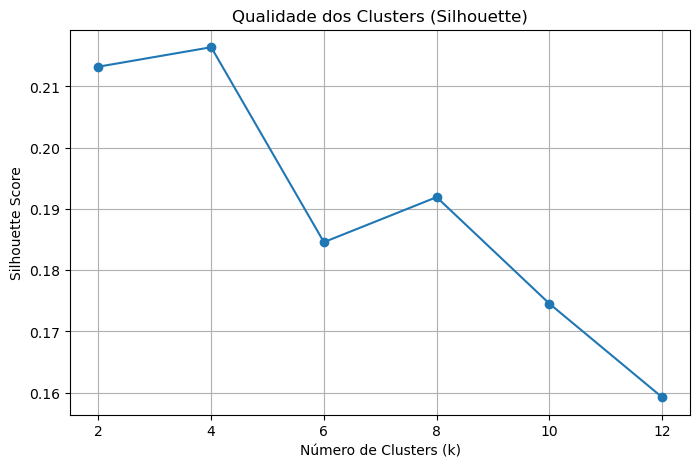

In [127]:
# criacao de DataFrame
df_kmeans = pd.DataFrame(results)

# plotagem da visualização da silhouette score X nº de clusters
plt.figure(figsize=(8, 5))
plt.plot(df_kmeans["N_clusters"], df_kmeans["Silhouette_score"], marker='o')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Qualidade dos Clusters (Silhouette)")
plt.grid(True)
plt.show()

In [128]:
# Visualização de DataFrame para conferência do resultado
display(df_kmeans.sort_values('Silhouette_score', ascending = False))
best_k = df_kmeans.sort_values('Silhouette_score', ascending = False).iloc[0]['N_clusters']

,N_clusters,Silhouette_score
1,4,0.216396
0,2,0.213219
3,8,0.191922
2,6,0.184574
4,10,0.174539
5,12,0.159259


In [129]:
# definição dos parâmetros para treinamento
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
labels = kmeans.fit_predict(X)
best_score_k = mt.silhouette_score(X, labels)

# redução da dimensionalidade para plotagem
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


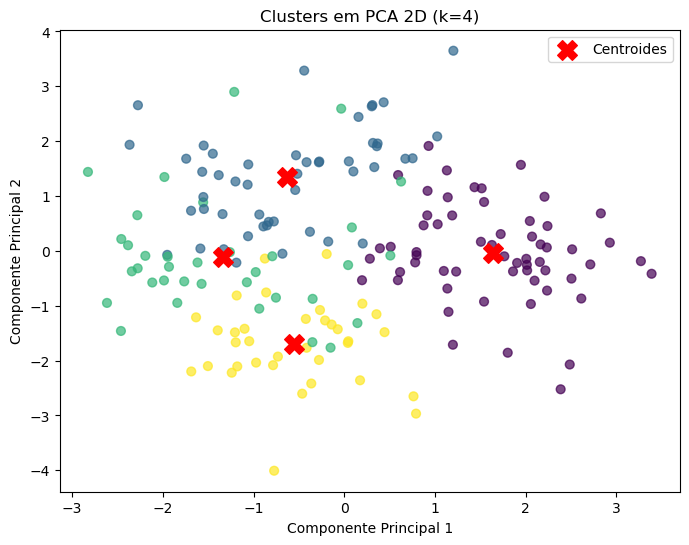

In [130]:
# plotagem dos clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=40, alpha=0.7)
plt.scatter(
    pca.transform(kmeans.cluster_centers_)[:, 0],  # centróides no espaço PCA
    pca.transform(kmeans.cluster_centers_)[:, 1],
    c="red", marker="X", s=200, label="Centroides"
)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title(f"Clusters em PCA 2D (k={int(best_k)})")
plt.legend()
plt.show()

### Affinity Propagation

In [131]:
# verificação do melhor parâmetro do treinamento
preferences = np.arange(-1, -301, -1)
results = []

for p in preferences:
    aff_propag = AffinityPropagation(preference=p, random_state=0)
    labels = aff_propag.fit_predict(X)
    scores_aff = mt.silhouette_score(X, labels)
    results.append({"Preferences": p,
                   "Silhouette_score": scores_aff
                   })

\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


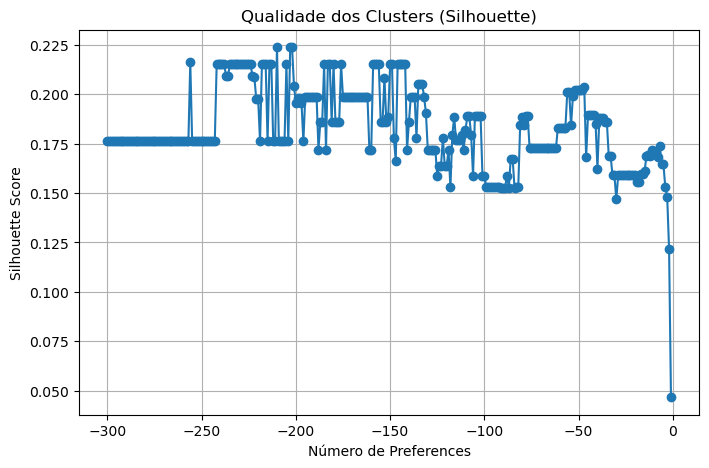

In [132]:
# criacao de DataFrame
df_aff_propag = pd.DataFrame(results)

# plotagem da visualização da silhouette score X nº de preferences
plt.figure(figsize=(8, 5))
plt.plot(df_aff_propag["Preferences"], df_aff_propag["Silhouette_score"], marker='o')
plt.xlabel("Número de Preferences")
plt.ylabel("Silhouette Score")
plt.title("Qualidade dos Clusters (Silhouette)")
plt.grid(True)
plt.show()

In [133]:
# Visualização de DataFrame para conferência do resultado
display(df_aff_propag.sort_values('Silhouette_score', ascending = False))
best_preference = df_aff_propag.sort_values('Silhouette_score', ascending = False).iloc[0]['Preferences']

,Preferences,Silhouette_score
209,-210,0.223820
201,-202,0.223820
202,-203,0.223820
255,-256,0.216296
239,-240,0.215123
...,...,...
89,-90,0.152777
2,-3,0.148043
29,-30,0.146747
1,-2,0.121471


In [134]:
# definição dos parâmetros para treinamento
aff_propag = AffinityPropagation(preference=-210, random_state=0)
labels = aff_propag.fit_predict(X)
best_score_preference = mt.silhouette_score(X, labels)

# redução da dimensionalidade para plotagem
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
\\?\C:\Users\erico\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


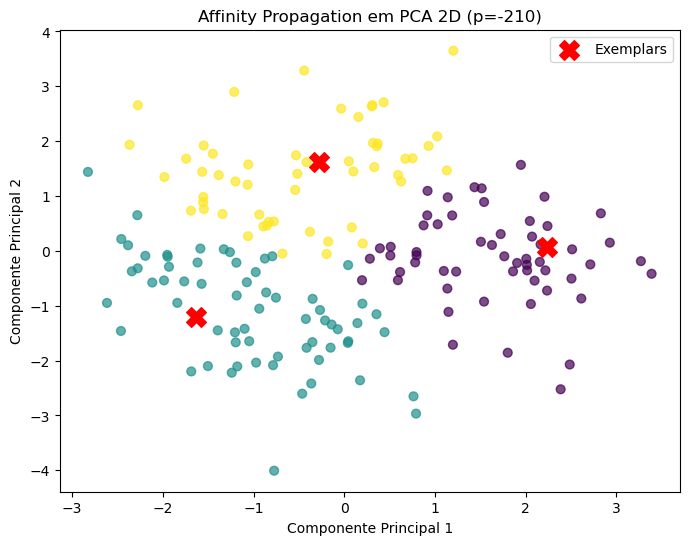

In [135]:
# plotagem dos clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0], 
    X_pca[:, 1], 
    c=labels, 
    cmap="viridis", 
    s=40, 
    alpha=0.7
)
plt.scatter(
    pca.transform(aff_propag.cluster_centers_)[:, 0],  # exemplars no espaço PCA
    pca.transform(aff_propag.cluster_centers_)[:, 1],
    c="red", marker="X", s=200, label="Exemplars"
)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title(f"Affinity Propagation em PCA 2D (p={int(best_preference)})")
plt.legend()
plt.show()

## Cluster Results

In [136]:
#armazenamento e visualização dos resultados
clusters_results = [
    
    {
    "Algoritmo": "KMeans",
    "Numero de clusters": 4,
    "Silhouette Score": best_score_k
    },
    
    {
    "Algoritmo": "Affinity Propagation",
    "Numero de clusters": 3,
    "Silhouette Score": best_score_preference
    }
      
    ]

df_cluster_results = pd.DataFrame(clusters_results)
df_cluster_results

,Algoritmo,Numero de clusters,Silhouette Score
0,KMeans,4,0.216396
1,Affinity Propagation,3,0.223820
